In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Dataset.csv")

# Convert it into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows to verify the data
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
most_restaurants = df['City'].value_counts().idxmax()
most_restaurants

'New Delhi'

In [4]:
top_ten_cities = df['City'].value_counts().nlargest(10).index
df_top_ten_cities = df[df['City'].isin(top_ten_cities)]

<ipython-input-5-531ee5f37ee8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df_top_ten_cities, order=top_ten_cities, palette='viridis')


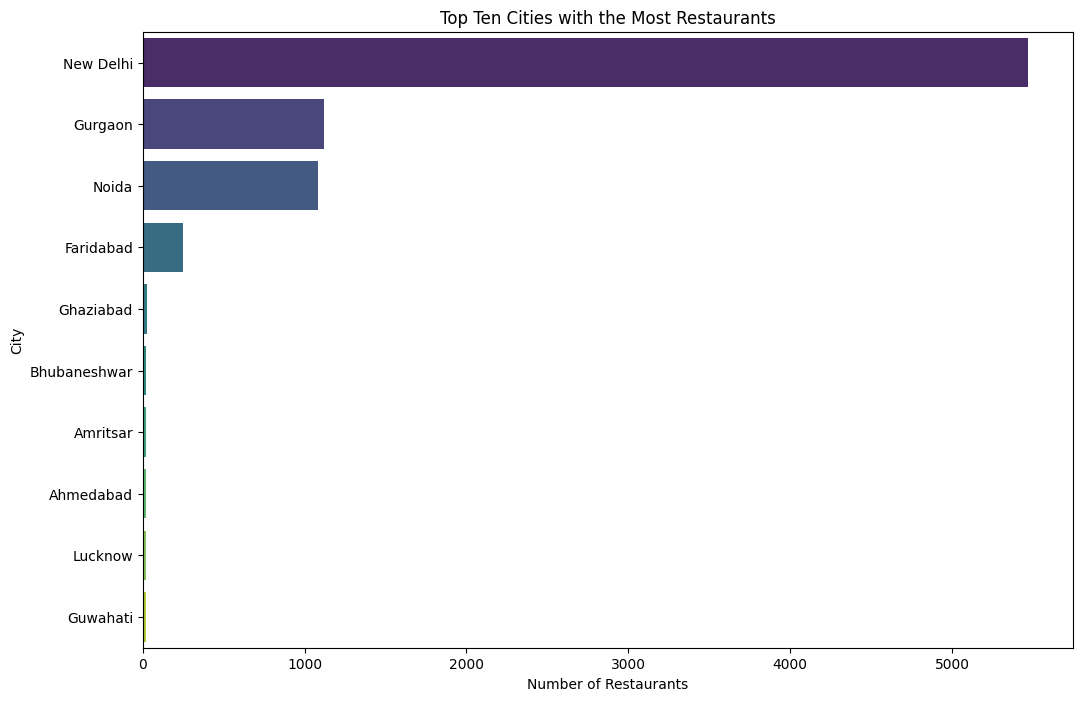

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(y='City', data=df_top_ten_cities, order=top_ten_cities, palette='viridis')
plt.title('Top Ten Cities with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [10]:
# Group by 'City' and calculate the mean of 'Aggregate rating'
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

# Get the maximum rating value (highest average rating)
highest_avg_rating_value = average_rating_by_city.max()

# Get the city with the highest average rating
highest_avg_rating_city = average_rating_by_city.idxmax()

print("City with the highest average rating:", highest_avg_rating_city)
print("Highest average rating:", highest_avg_rating_value)


City with the highest average rating: Inner City
Highest average rating: 4.9


In [11]:
average_ratings = df.groupby('City')['Aggregate rating'].mean()
top_ten_cities = average_ratings.sort_values(ascending=False)
top_ten_cities

,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000
...,...
New Delhi,2.438845
Montville,2.400000
Mc Millan,2.400000


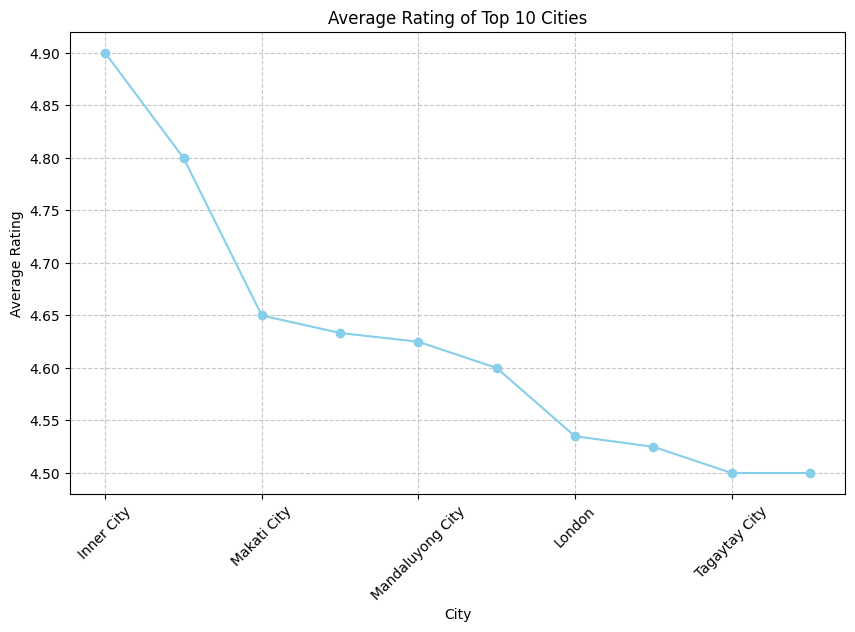

In [13]:
import matplotlib.pyplot as plt

# Sort cities by average rating in descending order and select top 10
top_ten_cities = average_ratings.sort_values(ascending=False).head(10)

# Create figure
plt.figure(figsize=(10, 6))

# Plot line chart
top_ten_cities.plot(kind='line', marker='o', linestyle='-', color='skyblue')

# Add title and labels
plt.title('Average Rating of Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Display plot
plt.show()
